# Grading Rubric
### Business Understanding (10 points total).

• Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

(Nnenna)


We are predicting Injury Severity 

### Data Understanding (80 points total)

#### Data Meaning Type
• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file.

(Nnenna)
#### Data Quality
• [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Be specific.

(Satvik and Dylan)
Data cleaning - added features, cleaned

scatter plots

#### Simple Statistics
• [10 points] Give simple, appropriate statistics (range, mode, mean, median, variance,
counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.

(Dylan)
describe()

#### Visualize Attributes
• [15 points] Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.

bar graph top makes or model

proportion plots - classification

Satvik

#### Explore Joint Attributes
• [15 points] Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

(Jobin)
boxplots - injury severity

correlation

violin plot 




#### Explore Attributes and Class
• [10 points] Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

Accuracy, precision, recall - categorical
ROC Curves, AUC

RMSE
(Jobin)

#### New Features
• [5 points] Are there other features that could be added to the data or created from existing features? Which ones?

Copy from earlier, use some columns for another dataset.

Dylan/Satvik

#### Exceptional Work (10 points total)
• You have free reign to provide additional analyses.
• One idea: implement dimensionality reduction, then visualize and interpret the results.  

# Lab 1 - Visualization and Preprocessing 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

import plotly.express as px
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

# Business Understanding

### Describe the purpose of the data set you selected:

• Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

Info about number of records, number of attributes etc.



In [44]:
#Read in the Aviation Data
aviation_data = pd.read_csv("Data/AviationData.csv")
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85976 entries, 0 to 85975
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                85976 non-null  object 
 1   Investigation.Type      85963 non-null  object 
 2   Accident.Number         85976 non-null  object 
 3   Event.Date              85976 non-null  object 
 4   LOCATION                85898 non-null  object 
 5   Country                 85469 non-null  object 
 6   Latitude                31587 non-null  float64
 7   Longitude               31578 non-null  float64
 8   Airport.Code            48612 non-null  object 
 9   Airport.Name            51298 non-null  object 
 10  Injury.Severity         85842 non-null  object 
 11  Aircraft.damage         83047 non-null  object 
 12  Aircraft.Category       29226 non-null  object 
 13  Registration.Number     81756 non-null  object 
 14  Make                    85908 non-null

# Data Understanding

### Data Meaning Type

• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file.

In [45]:
pd.set_option('display.max_columns', 32)
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,Fatal,Substantial,Airplane,N13VT,Velocity,Vtwin,No,2.0,NaN,91,NaN,Ferry,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,Fatal,Destroyed,Helicopter,N13AT,Bell,206,No,1.0,NaN,91,NaN,Aobv,Caribbean Buzz Management Llc.,4.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,Minor,Substantial,Airplane,N56517,Maule,M-6-235,No,1.0,NaN,91,NaN,Personal,Paul Andrews,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,Non-Fatal,Substantial,Airplane,N3477E,Cessna,172N,No,1.0,NaN,91,NaN,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,Minor,Substantial,Airplane,N8183C,Piper,PA-18,No,1.0,NaN,91,NaN,Personal,Case Robert,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


### Data Quality

• [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Be specific.


In [46]:
#We have 30 columns to work with
#First we will check to see what percent of each column is null

#Percent of missing data
percent_missing = aviation_data.isnull().sum() * 100 / len(aviation_data)
#Create DF 
missing_value_df = pd.DataFrame({'column_name': aviation_data.columns,
                                 'percent_missing': percent_missing})
#Then sort by least to most
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
Air.carrier,Air.carrier,94.660138
Schedule,Schedule,85.834419
FAR.Description,FAR.Description,66.352238
Aircraft.Category,Aircraft.Category,66.006793
Longitude,Longitude,63.271145
Latitude,Latitude,63.260677
Airport.Code,Airport.Code,43.458640
Airport.Name,Airport.Name,40.334512
Total.Serious.Injuries,Total.Serious.Injuries,35.486647
Total.Minor.Injuries,Total.Minor.Injuries,34.057179


##### Missing Values
Looking at the missing values, there are several values we would like to remove. We want to remove the Schedule column, because 85% of the observations are missing and FAR.description because 66% of the observations are missing. Other columns of interest such as Event Id appear to have many redundant and unusable values due to being transformed by a program like Excel. Other features like Longitude, Latitude, Airport Code, Registration Number, and Event Date are not useful predictors in the model. So they have been removed.

Add part about converting NAs for injuries to zero

##### Outliers

Log transform outliers because injuries columns are highly right skewed

[Insert density plots to show skewness]

##### Duplicate data

##### Adding Features
We wanted to create some additional predictors in our data that may be more meaningful. First, we wanted to split the 'LOCATION' column into a "City" and "State Column". Next, we will add a column called "Total Injuries" which is the sum of Total Fatal Injuries, Total Minor Injuries and Total Serious Injuries.


In [47]:
#splitting state and city from location
aviation_data['City'] = aviation_data['LOCATION'].str.split(',').str[0]
aviation_data['State'] = aviation_data['LOCATION'].str.split(',').str[1]

In [48]:
#Converted NaN to 0 so we can create the total Injuries column

In [49]:
#adding a total injuries column
#next we need to fill in the NaN values with the injury columns in order to make our new column
#many of the rows filled in NaN opposed to 0 for number of injuries
aviation_data.update(aviation_data[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].fillna(0))

aviation_data["Total_Injuries"] = aviation_data['Total.Fatal.Injuries'] \
                            + aviation_data['Total.Serious.Injuries'] \
                            + aviation_data['Total.Minor.Injuries']
num_inj=aviation_data[["Total_Injuries",'Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries',]]
num_inj.tail(10)

,Total_Injuries,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
85966,3.0,0.0,0.0,3.0
85967,0.0,0.0,0.0,0.0
85968,0.0,0.0,0.0,0.0
85969,4.0,4.0,0.0,0.0
85970,1.0,0.0,0.0,1.0
85971,3.0,1.0,2.0,0.0
85972,2.0,2.0,0.0,0.0
85973,3.0,3.0,0.0,0.0
85974,4.0,4.0,0.0,0.0
85975,2.0,2.0,0.0,0.0


##### Duplicates

In [10]:
#checking for duplicates
#before we step into ourliars we would like to look for duplicates
#using the field acident number we will search for duplicates
aviation_data[aviation_data.duplicated(subset=['Accident.Number'])]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,State,Total_Injuries
973,20200509X85739,Accident,ERA20CA175,2020-05-03,"SHIRLEY, NY",United States,40.828056,-72.865554,HWV,BROOKHAVEN,Non-Fatal,Substantial,Airplane,N11457,Waco,QCF,...,Reciprocating,91,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN,SHIRLEY,NY,0.0


In [11]:
#now that we see we have a duplicate lets compare them
aviation_data[aviation_data['Accident.Number']=='ERA20CA175']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,State,Total_Injuries
972,20200509X85739,Accident,ERA20CA175,2020-05-03,"SHIRLEY, NY",United States,40.828056,-72.865556,HWV,BROOKHAVEN,Non-Fatal,Substantial,Airplane,N11457,Waco,QCF,...,NaN,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,Preliminary,15-05-2020,SHIRLEY,NY,0.0
973,20200509X85739,Accident,ERA20CA175,2020-05-03,"SHIRLEY, NY",United States,40.828056,-72.865554,HWV,BROOKHAVEN,Non-Fatal,Substantial,Airplane,N11457,Waco,QCF,...,Reciprocating,91,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN,SHIRLEY,NY,0.0


In [12]:
#remove the duplicate and merge in the data
aviation_data = aviation_data.drop_duplicates(subset='Accident.Number', keep="last")
aviation_data[aviation_data['Accident.Number']=='ERA20CA175'] #Checking for dups
#replace missing values in the duplicate kept - change report status from NaN to Preliminary
#rc_avaition.loc[rc_avaition['Accident.Number'] == , 'ERA20CA175'] = 1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,State,Total_Injuries
973,20200509X85739,Accident,ERA20CA175,2020-05-03,"SHIRLEY, NY",United States,40.828056,-72.865554,HWV,BROOKHAVEN,Non-Fatal,Substantial,Airplane,N11457,Waco,QCF,...,Reciprocating,91,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN,SHIRLEY,NY,0.0


Removed 8.0 engine aircraft because it is experimental

In [14]:
aviation_data = aviation_data.loc[aviation_data["Number.of.Engines"]!=8.0]
engines=aviation_data["Number.of.Engines"].value_counts().reset_index()

,index,Number.of.Engines
0,1.0,67513
1,2.0,10793
2,0.0,1182
3,3.0,481
4,4.0,428


In [15]:
#
injuryseverity = aviation_data["Injury.Severity"].value_counts().reset_index()
injuryseverity

,index,Injury.Severity
0,Non-Fatal,64383
1,Fatal(1),8435
2,Fatal(2),4970
3,Incident,3652
4,Fatal(3),1552
...,...,...
127,Fatal(49),1
128,Fatal(114),1
129,Fatal(199),1
130,Fatal(57),1


##### Injury Severity column fixing the levels
Data clean up require us to fix the Injury Severity column. As you can see there are some observations that have incorrectly names

In [16]:
aviation_data.loc[aviation_data['Injury.Severity'].str.contains('Non-Fatal', na=False), 'Injury.Severity'] = 'latafnon'
aviation_data.loc[aviation_data['Injury.Severity'].str.contains('Fatal', na=False), 'Injury.Severity'] = 'Fatal'
aviation_data.loc[aviation_data['Injury.Severity'].str.contains('latafnon', na=False), 'Injury.Severity'] = 'Non-Fatal'

#fill in NA values with Unavailable
aviation_data['Injury.Severity'] = aviation_data['Injury.Severity'].fillna("Unavailable")
#fix spelling error of Siruose
aviation_data.loc[aviation_data['Injury.Severity'].str.contains('Siruose', na=False), 'Injury.Severity'] = 'Serious'

injuryseverity = aviation_data["Injury.Severity"].value_counts().reset_index()
injuryseverity

,index,Injury.Severity
0,Non-Fatal,64383
1,Fatal,17275
2,Incident,3652
3,Unavailable,441
4,Minor,122
5,Serious,101


In [18]:
#Filled NaNs to Unknowns
aviation_data.update(aviation_data.fillna("Unknown"))
aviation_data.head(1)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,State,Total_Injuries
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,Unknown,Unknown,Fatal,Substantial,Airplane,N13VT,Velocity,Vtwin,...,Unknown,91,Unknown,Ferry,Unknown,2.0,0.0,0.0,0.0,VMC,Unknown,Unknown,Unknown,JANESVILLE,WI,2.0


In [ ]:
#Weather Column UNK to Unknown

Removed the columns for final dataframe

In [19]:
rc_aviation = aviation_data.copy()
rc_aviation = rc_aviation.drop(columns=['FAR.Description', 'Event.Id',"Longitude",
                                        "Latitude","Airport.Code","Publication.Date","Registration.Number","LOCATION",
                                        "Schedule","Event.Date"])
rc_aviation.columns

Index(['Investigation.Type', 'Accident.Number', 'Country', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'City',
       'State', 'Total_Injuries'],
      dtype='object')

In [20]:
rc_aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85974 entries, 0 to 85975
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      85974 non-null  object 
 1   Accident.Number         85974 non-null  object 
 2   Country                 85974 non-null  object 
 3   Airport.Name            85974 non-null  object 
 4   Injury.Severity         85974 non-null  object 
 5   Aircraft.damage         85974 non-null  object 
 6   Aircraft.Category       85974 non-null  object 
 7   Make                    85974 non-null  object 
 8   Model                   85974 non-null  object 
 9   Amateur.Built           85974 non-null  object 
 10  Number.of.Engines       85974 non-null  object 
 11  Engine.Type             85974 non-null  object 
 12  Purpose.of.flight       85974 non-null  object 
 13  Air.carrier             85974 non-null  object 
 14  Total.Fatal.Injuries    85974 non-null

In this section, we will verify the data quality, explain missing values, duplicate data, and outliers. We will also deal with missing values and address any points of interest. Something we would like to do before looking at missing values is make the data easier to read by adding some columns. We will split the "LOCATION" column into "City" and "State". Next, we will add a column called "Total Injuries" which is the sum of Total Fatal Injuries, Total Minor Injuries and Total Serious Injuries.


Looking at the head of the data we can see some redundant columns such as location, since we split it into state and city, some missing values and a few opportunites to combine data and create new columns such as Total Injuries. Other columns of interest are Event ID which appears to have been transformed by a program like excel in order to fit all the charactors and Accident number which could be used to check for duplicates.

What we can see from the missing data above is categories such as Air Carrier and schedule are missing the most. When prodicting with this dataset we will primarly forcus on total number of injuries and Injury severity. Something to consider with the missing data in air carrier is if there was a corrlation between air carrier and plane crashes I don't beleive that business would still be operating.

Regarding many of the missing values in the fields: Total Fatal Injuries, Total Minor Injuries and Total Serious Injuries: we will be adding a total injuries column and consult outside sources to confirm these nulls as 0s. In this report some lack of injuries were marked as NaN to indicate that someone did not sustain an injury.

In [ ]:
#dropping FAR.Descripiton, schedule, air.carrier due to a lack of data
#dropping location as it is redundant to city, state and country
#also dropping column named "text" I am not sure how that got into our df
rc_aviation = aviation_data.copy()
rc_aviation = rc_aviation.drop(columns=['FAR.Description', 'Event.Id',"Longitude",
                                        "Latitude","Airport.Code","Publication.Date","Registration.Number","LOCATION",
                                        "Schedule","Event.Date"])
rc_aviation.columns

Using Accident Number as an indicator we checked of duplicates. There was one that we found which looked to be entered twice and is clearly an error. That duplicate was removed.

One big issue with this dataset was in the inconsistant catigorical variables. We noticed that injury servarity had multipal redundant catorgies that we needed to clean up. After cleanup we are left with 5 final categories which are recongized by NTSB as: Fatal, Incident, Unavailable, Minor, Serious.

In [ ]:
#injury outliars
#one thing to note about our dataset is it is heavily right skewed which means the majority of our data values are low
#this should be the case since high fatality flights are rare compared to samller 2-4 person planes
sns.displot(rc_aviation,x= "Total_Injuries", hue = "Number.of.Engines")
plt.show()

In [ ]:
inj_stat = rc_aviation[["Total_Injuries",'Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']]
inj_stat.plot.kde()
                       

Need to convert Total Injuries to integer, clean up fails, remove 8 engine NASA flight, drop the remaining columns, Injury Severity, that we are going to remove:

Event.db, Accident.Number, Far.Description, Longitude, Latitude, Airport Code, Total Serious Injuries, Total.Minor.Injuries, Total.Fatal.Injuries, Publication.Date, Registration.Number, LOCATION, Accident.Number


Total Injuries = Total Serious Injuries + Total.Minor.Injuries + Total.Fatal.Injuries
Location = City, State



Report.Status?

# Simple Statisitics

In [ ]:
rc_aviation.plot.scatter("Total_Injuries","Total.Uninjured")

In [ ]:
#looking at accidents by Country
aviation_country = rc_aviation['Country'].groupby(rc_aviation['Country']).count()
aviation_country


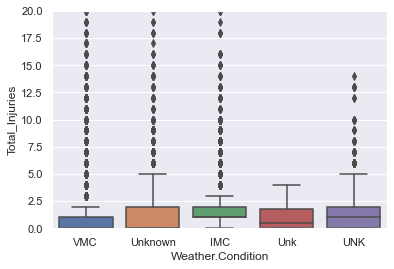

In [51]:
#Box plot for weather condition  of the flight 
# might be good to limit the size of the axis 

sns.boxplot( x=rc_aviation["Weather.Condition"], y=rc_aviation["Total_Injuries"] );
plt.ylim(0, 20)
plt.show()